In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [2]:
houses_df = pd.read_csv("input.csv")

In [3]:
houses_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
keep_col = [
    "price",
    "bedrooms",
    "sqft_lot",
    "floors"
]

houses_df = houses_df[keep_col]
houses_df.columns= ["price", "bedrooms", "sqft", "floors"]

In [5]:
houses_df.head()

,price,bedrooms,sqft,floors
0,221900.0,3,5650,1.0
1,538000.0,3,7242,2.0
2,180000.0,2,10000,1.0
3,604000.0,4,5000,1.0
4,510000.0,3,8080,1.0


In [6]:
houses_mean = houses_df.mean()
houses_std = houses_df.std()

norm_df = houses_df - houses_mean
norm_df = houses_df / houses_std

y = norm_df["price"]
norm_df = norm_df.drop(labels=["price"], axis=1)

In [7]:
norm_df.head()

,bedrooms,sqft,floors
0,3.225592,0.136406,1.85189
1,3.225592,0.174841,3.70378
2,2.150395,0.241426,1.85189
3,4.300789,0.120713,1.85189
4,3.225592,0.195072,1.85189


In [76]:
m = len(norm_df)
theta = pd.DataFrame(columns=["theta"])
alpha = 0.01
num_iters = 400

for index, value in enumerate(norm_df.columns.values):
    theta.loc[index] = 0

norm_df = norm_df.astype(np.float64)

In [14]:
print(theta.shape)
print(norm_df.shape)

norm_df.head()

(3, 1)
(21613, 3)


,bedrooms,sqft,floors
0,3.225592,0.136406,1.85189
1,3.225592,0.174841,3.70378
2,2.150395,0.241426,1.85189
3,4.300789,0.120713,1.85189
4,3.225592,0.195072,1.85189


In [10]:
def compute_cost(norm_df, y, theta, m):
    h_x = np.dot(norm_df, theta)
    h_x = pd.DataFrame(data=h_x)
    h_x = h_x[0]
    diff_val = h_x.subtract(y)
    square_val = diff_val ** 2
    sum_val = np.sum(square_val)
    J = sum_val / (2 * m)
    return J

In [82]:
J_history = []
def gradient(norm_df, y, theta, m, alpha):
    global J_history
    h_x = np.dot(norm_df, theta)
    h_x = pd.DataFrame(data=h_x)
    h_x = h_x[0]
    diff_val = h_x.subtract(y)
    prod_val = norm_df.apply(lambda x: x * diff_val)
    prod_val = prod_val.sum()
    delta = prod_val / m
    alpha_delta = delta * alpha
    theta = theta.apply(lambda x:x - alpha_delta.values)
    J_history.append(compute_cost(norm_df, y, theta, m))
    return theta

In [83]:
num_iters = 400
for i in range(num_iters):
    theta = gradient(norm_df, y, theta, m, alpha)

In [84]:
theta

,theta
0,0.249295
1,0.080566
2,0.196684


<IPython.core.display.Javascript object>


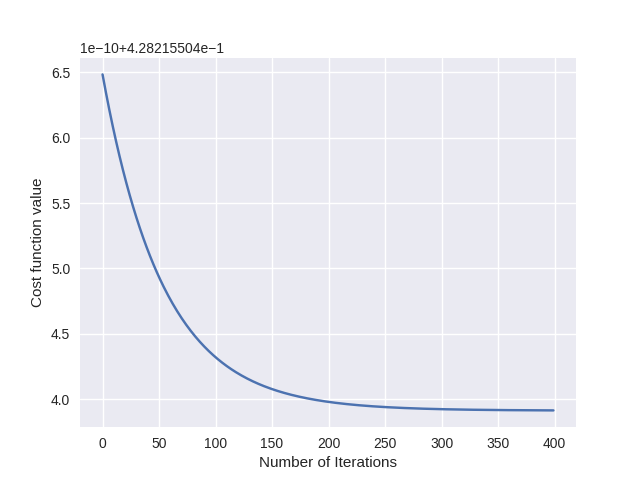

In [89]:
_ = plt.plot(np.arange(0, 400), J_history)
_ = plt.xlabel("Number of Iterations")
_ = plt.ylabel("Cost function value")